<a href="https://colab.research.google.com/github/jpsicilia/car-decision-tree/blob/main/Arbol_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import category_encoders as ce

In [49]:
df=pd.read_csv('car_evaluation.csv',header=None)

In [50]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [51]:
for col in col_names:

    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


###Declarar el vector de features y la variable target

In [52]:
X=df.drop(["class"],axis=1)
y=df["class"]

###Dividir el dataset en train e test


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.33,random_state=42,)

###Encode variables categoricas


In [54]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [55]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
734,1,1,1,1,1,1
717,1,1,2,2,2,2
454,1,2,3,3,1,3
264,2,1,4,3,1,2
75,2,2,2,3,1,2


In [56]:
print(encoder.mapping)


[{'col': 'buying', 'mapping': high     1
vhigh    2
med      3
low      4
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'maint', 'mapping': med      1
vhigh    2
low      3
high     4
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'doors', 'mapping': 5more    1
4        2
2        3
3        4
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'persons', 'mapping': 2       1
4       2
more    3
NaN    -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'lug_boot', 'mapping': med      1
big      2
small    3
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'safety', 'mapping': high    1
low     2
med     3
NaN    -2
dtype: int64, 'data_type': dtype('O')}]


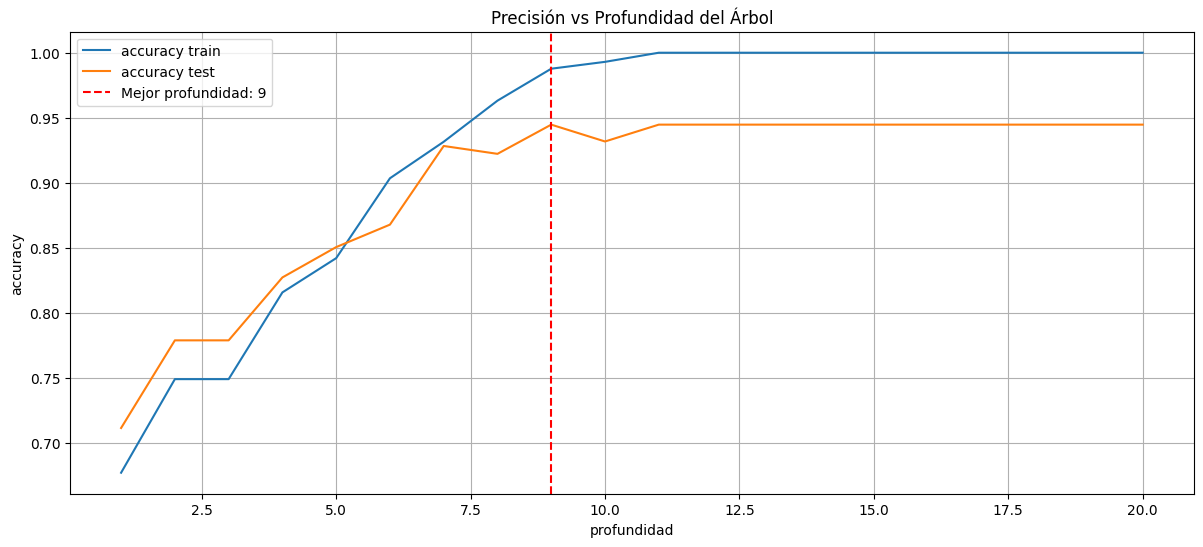

In [57]:
# Definimos el rango de profundidades que queremos probar
profundidades = list(range(1, 21))  # De 1 a 20

# Listas para guardar resultados
resultados_train = []
resultados_test = []

# Bucle que entrena un árbol con cada profundidad
for profundidad in profundidades:
    arbol = DecisionTreeClassifier(max_depth=profundidad, random_state=42)
    arbol.fit(X_train, y_train)

    # Predicciones
    y_train_pred = arbol.predict(X_train)
    y_test_pred = arbol.predict(X_test)

    # Accuracy en train y test
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_test_pred))

# Graficar los resultados
f, ax = plt.subplots(1, 1, figsize=(14.5, 6), sharey=True)
ax.plot(profundidades, resultados_train, label='accuracy train')
ax.plot(profundidades, resultados_test, label='accuracy test')
mejor_idx = np.argmax(resultados_test)
mejor_prof = profundidades[mejor_idx]
ax.axvline(mejor_prof, linestyle='--', color='red', label=f"Mejor profundidad: {mejor_prof}")
ax.legend()
ax.set(xlabel='profundidad', ylabel='accuracy')
plt.grid()
plt.title('Precisión vs Profundidad del Árbol')
plt.show()




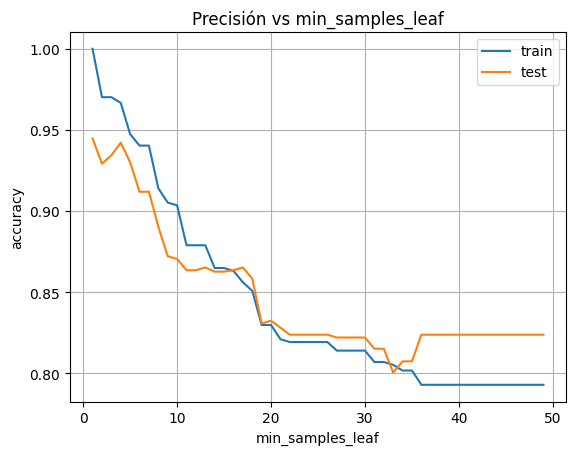

In [58]:
valores_leaf = range(1, 50)
resultados_train, resultados_test = [], []

for val in valores_leaf:
    modelo = DecisionTreeClassifier(min_samples_leaf=val, random_state=42)
    modelo.fit(X_train, y_train)
    resultados_train.append(modelo.score(X_train, y_train))
    resultados_test.append(modelo.score(X_test, y_test))

plt.plot(valores_leaf, resultados_train, label="train")
plt.plot(valores_leaf, resultados_test, label="test")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.title("Precisión vs min_samples_leaf")
plt.legend()
plt.grid()
plt.show()


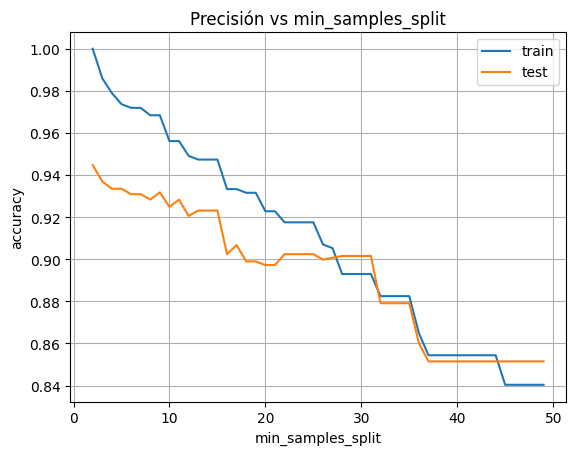

In [59]:
valores_split = range(2, 50)
resultados_train, resultados_test = [], []

for val in valores_split:
    modelo = DecisionTreeClassifier(min_samples_split=val, random_state=42)
    modelo.fit(X_train, y_train)
    resultados_train.append(modelo.score(X_train, y_train))
    resultados_test.append(modelo.score(X_test, y_test))

plt.plot(valores_split, resultados_train, label="train")
plt.plot(valores_split, resultados_test, label="test")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.title("Precisión vs min_samples_split")
plt.legend()
plt.grid()
plt.show()


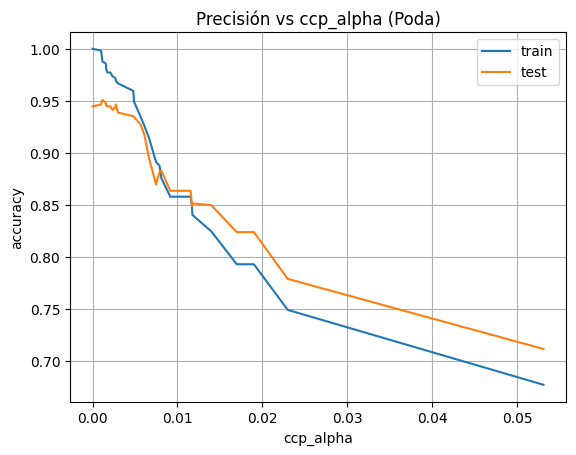

In [60]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Excluí el último (vacío)

resultados_train, resultados_test = [], []

for alpha in ccp_alphas:
    modelo = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    modelo.fit(X_train, y_train)
    resultados_train.append(modelo.score(X_train, y_train))
    resultados_test.append(modelo.score(X_test, y_test))

plt.plot(ccp_alphas, resultados_train, label="train")
plt.plot(ccp_alphas, resultados_test, label="test")
plt.xlabel("ccp_alpha")
plt.ylabel("accuracy")
plt.title("Precisión vs ccp_alpha (Poda)")
plt.legend()
plt.grid()
plt.show()


In [61]:
# instantiate the DecisionTreeClassifier model with criterion gini index

tree=DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0,ccp_alpha=1,min_samples_leaf=5,min_samples_split=2)


# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=1, max_depth=7, min_samples_leaf=5,
                       random_state=0)

In [62]:
tree.score(X_train, y_train)

0.6771929824561403

In [63]:
y_pred=tree.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7116


In [65]:
y_pred_train = arbol.predict(X_train)

y_pred_train

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'vgood', 'good', 'unacc', 'unacc', 'unacc',
       'unacc', 'vgood', 'vgood', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'vgood', 'vgood', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc',
       'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
      

In [66]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [67]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree.score(X_test, y_test)))

Training set score: 0.6772
Test set score: 0.7116
